In [37]:
# import deep learning libraries
from tensorflow import keras
from tensorflow.keras.datasets import mnist

# import preprocessing
from sklearn.preprocessing import LabelBinarizer

# import metrics
from sklearn.metrics import classification_report

# import image display library
import matplotlib.pyplot as plt

In [27]:
# load the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

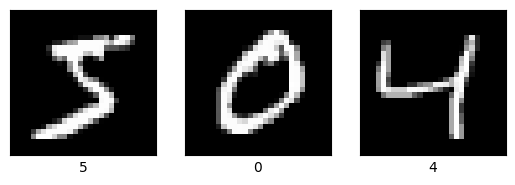

In [28]:
# view the inputs
plt.figure()
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(str(y_train[i]))
    plt.imshow(x_train[i], cmap='gray', vmin=0, vmax=255)
plt.show()

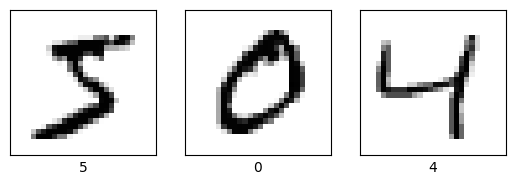

In [29]:
def transform(img: np.ndarray) -> np.ndarray:
    """Convert image to float32 data type and make range [0, 1]. Additionally, inverts the colors"""
    return (255 - img).astype('float32') / 255

# transform the inputs
transformed_x_train = transform(x_train)
transformed_x_test = transform(x_test)

# view the inputs
plt.figure()
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(str(y_train[i]))
    plt.imshow(transformed_x_train[i], cmap='gray', vmin=0, vmax=1)
plt.show()

In [30]:
# convert labels to one hot encoding
encoder = LabelBinarizer()
transformed_y_train = encoder.fit_transform(y_train)
transformed_y_test = encoder.transform(y_test)

In [49]:
def get_model():
    model = keras.Sequential()

    # input layer
    model.add(keras.layers.InputLayer(input_shape=(28, 28, 1)))

    # first convolution layer
    model.add(keras.layers.Conv2D(32, (5, 5), padding='same', kernel_initializer='he_uniform'))
    model.add(keras.layers.ReLU())
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    
    # second convolution layer
    model.add(keras.layers.Conv2D(32, (3, 3), padding='same', kernel_initializer='he_uniform'))
    model.add(keras.layers.ReLU())
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

    # transition to fully connected layers
    model.add(keras.layers.Flatten())

    # first dense layer 
    model.add(keras.layers.Dense(64, kernel_initializer='he_uniform'))
    model.add(keras.layers.ReLU())
    model.add(keras.layers.Dropout(0.5))

    # second dense layer
    model.add(keras.layers.Dense(64, kernel_initializer='he_uniform'))
    model.add(keras.layers.ReLU())
    model.add(keras.layers.Dropout(0.5))

    # output layer
    model.add(keras.layers.Dense(10, kernel_initializer='he_uniform'))
    model.add(keras.layers.Softmax())
    return model

In [50]:
# create a model
model = get_model()
print(model.summary())
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss=keras.losses.CategoricalCrossentropy(from_logits=False),
    metrics='accuracy'
)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 re_lu_28 (ReLU)             (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_9 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 re_lu_29 (ReLU)             (None, 14, 14, 32)        0         
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 7, 7, 32)          0         
 ng2D)                                                

In [52]:
# train the model
model.fit(transformed_x_train, transformed_y_train, batch_size=128, epochs=10, validation_data=(transformed_x_test, transformed_y_test))

Epoch 1/10
469/469 [==============================] - 67s 140ms/step - loss: 1.7021 - accuracy: 0.3431 - val_loss: 0.4682 - val_accuracy: 0.9306
Epoch 2/10
469/469 [==============================] - 61s 130ms/step - loss: 0.8846 - accuracy: 0.6805 - val_loss: 0.1755 - val_accuracy: 0.9708
Epoch 3/10
469/469 [==============================] - 58s 123ms/step - loss: 0.5528 - accuracy: 0.8081 - val_loss: 0.1013 - val_accuracy: 0.9783
Epoch 4/10
469/469 [==============================] - 58s 124ms/step - loss: 0.4440 - accuracy: 0.8467 - val_loss: 0.0838 - val_accuracy: 0.9817
Epoch 5/10
469/469 [==============================] - 59s 126ms/step - loss: 0.3584 - accuracy: 0.8850 - val_loss: 0.0607 - val_accuracy: 0.9850
Epoch 6/10
469/469 [==============================] - 57s 122ms/step - loss: 0.3218 - accuracy: 0.8967 - val_loss: 0.0640 - val_accuracy: 0.9847
Epoch 7/10
469/469 [==============================] - 58s 124ms/step - loss: 0.2961 - accuracy: 0.9053 - val_loss: 0.0538 - val_ac

In [53]:
# evaluate the model
print(
    classification_report(
        model.predict(transformed_x_test).argmax(axis=1), 
        transformed_y_test.argmax(axis=1), 
        target_names=[str(x) for x in encoder.classes_]
    )
)

313/313 [==============================] - 3s 10ms/step
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       985
           1       0.99      0.99      0.99      1135
           2       0.99      0.98      0.99      1046
           3       0.99      1.00      0.99       999
           4       0.98      0.99      0.98       978
           5       0.99      0.98      0.99       907
           6       0.99      0.99      0.99       952
           7       0.98      0.99      0.99      1024
           8       0.99      0.98      0.99       983
           9       0.96      0.98      0.97       991

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [54]:
# save the model
model.save('base_model.keras')

In [56]:
# load the model
reloaded = keras.models.load_model('base_model.keras')

In [60]:
# evaluate the model
print(
    classification_report(
        reloaded.predict(transformed_x_test).argmax(axis=1), 
        transformed_y_test.argmax(axis=1), 
        target_names=[str(x) for x in encoder.classes_]
    )
)

313/313 [==============================] - 5s 14ms/step
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       985
           1       0.99      0.99      0.99      1135
           2       0.99      0.98      0.99      1046
           3       0.99      1.00      0.99       999
           4       0.98      0.99      0.98       978
           5       0.99      0.98      0.99       907
           6       0.99      0.99      0.99       952
           7       0.98      0.99      0.99      1024
           8       0.99      0.98      0.99       983
           9       0.96      0.98      0.97       991

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

